In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
sns.set()

### Klasyifkacja win
Zaczniemy od zaimportowania i wyświetlenia danych

In [112]:
df = load_wine()
wine = pd.DataFrame(data=df.data, columns=df.feature_names)
target = df.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Następnie sprawdźmy, które zmienne ze sobą korelują i wyodrębnijmy te najbardziej skorelowane

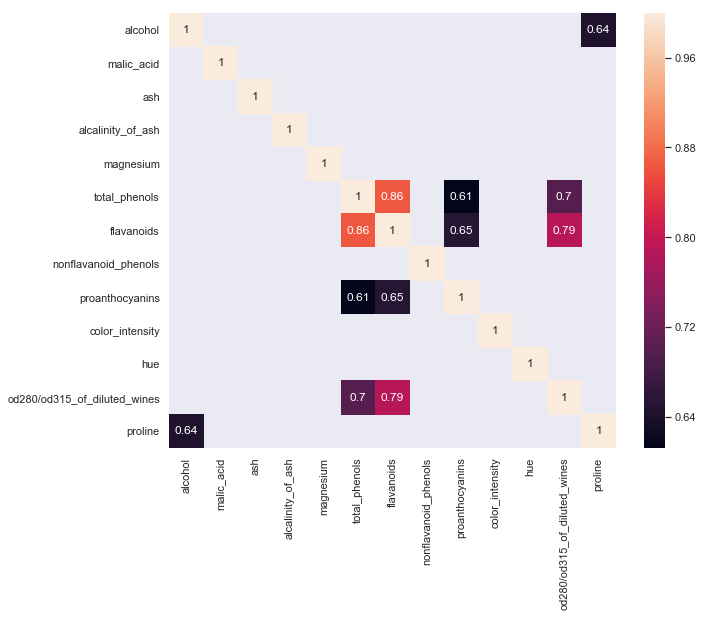

In [158]:
x = wine.corr()>0.6
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr()[x], annot=True)
plt.show()

Poszukajmy zależności z których będziemy mogli wyodrębnić klasy win

In [156]:
wine_cop = wine.copy()
wine_cop['target'] = pd.DataFrame(target)
wine_cop.head()
wine_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<Figure size 1440x1152 with 0 Axes>

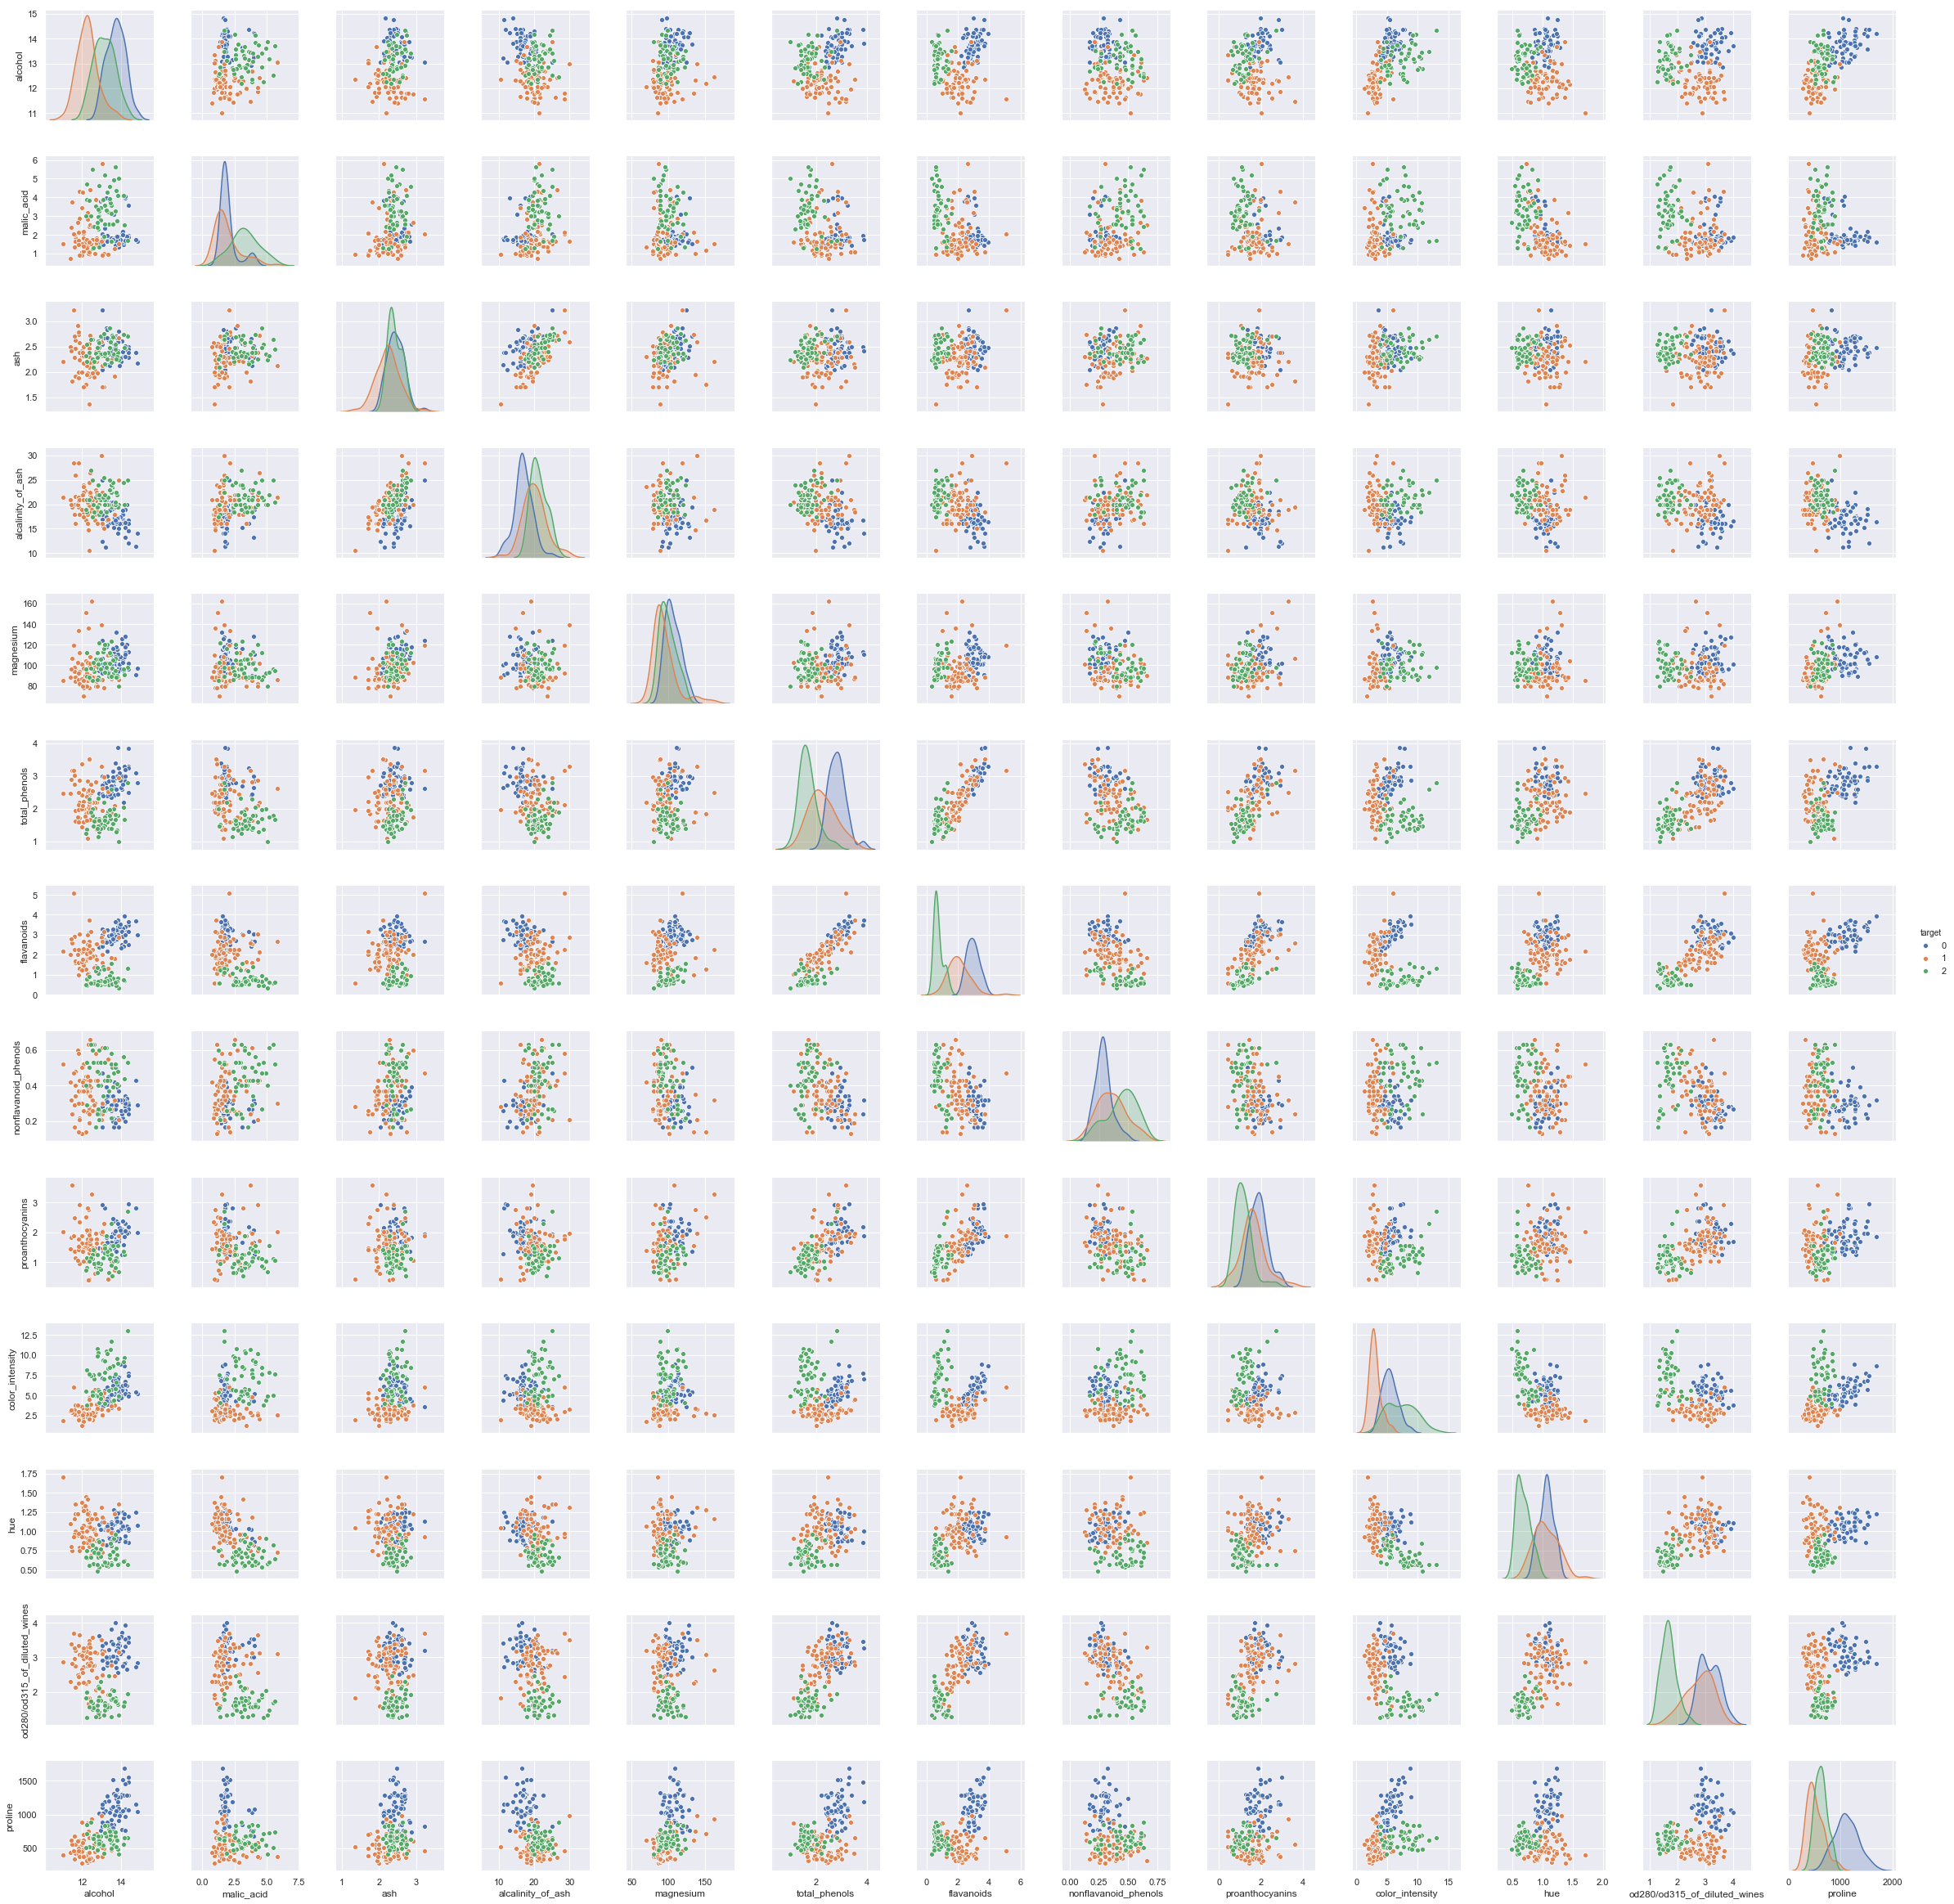

In [159]:
plt.figure(figsize=(20,16))
sns.pairplot(data=wine_cop, hue='target', vars=wine.columns)
plt.show()

Wiele wykresów do obejrzenia, wybrałem jeden z nich do przetestowania modelu.

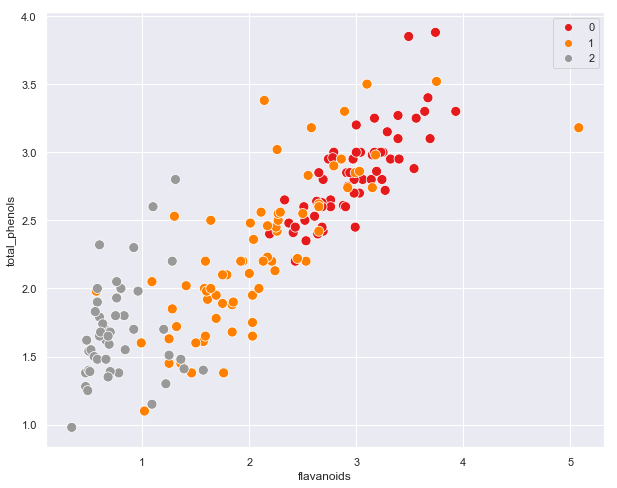

In [173]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='flavanoids', y='total_phenols', hue=target, palette="Set1", s=100, data=wine)
plt.show()

### Przewidywania z użyciem modelu SVC

In [160]:
scale = StandardScaler()
col = ['flavanoids', 'total_phenols']
X = scale.fit_transform(wine[col].values)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Testowanie
Udało się wytrenować nasz model Support Vector Classifier, teraz sprawdźmy jak sobie radzi

In [163]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  1,  0],
       [ 6,  9,  1],
       [ 0,  1,  5]], dtype=int64)

In [165]:
from sklearn.metrics import classification_report

print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.82      0.56      0.67        16
           2       0.83      0.83      0.83         6

    accuracy                           0.75        36
   macro avg       0.78      0.77      0.76        36
weighted avg       0.77      0.75      0.74        36




In [162]:
cross_val_score(clf, X_train, clf.predict(X_train), cv=5)

array([0.96551724, 0.93103448, 1.        , 0.92857143, 1.        ])

### Wykorzystanie większej ilości cech
Wyniki są całkiem niezłe, lecz widać kilka załamań dla klasy nr 1. Sprawdźmy jak wygląda podział klas dla tych konkretnych cech

In [100]:
Xv = X.reshape(-1,1)
h=0.02
xmin, xmax= Xv.min(), Xv.max()+1
ymin, ymax = target.min(), target.max()+1
xx, yy = np.meshgrid(np.arange(xmin,xmax,h), np.arange(ymin, ymax,h))

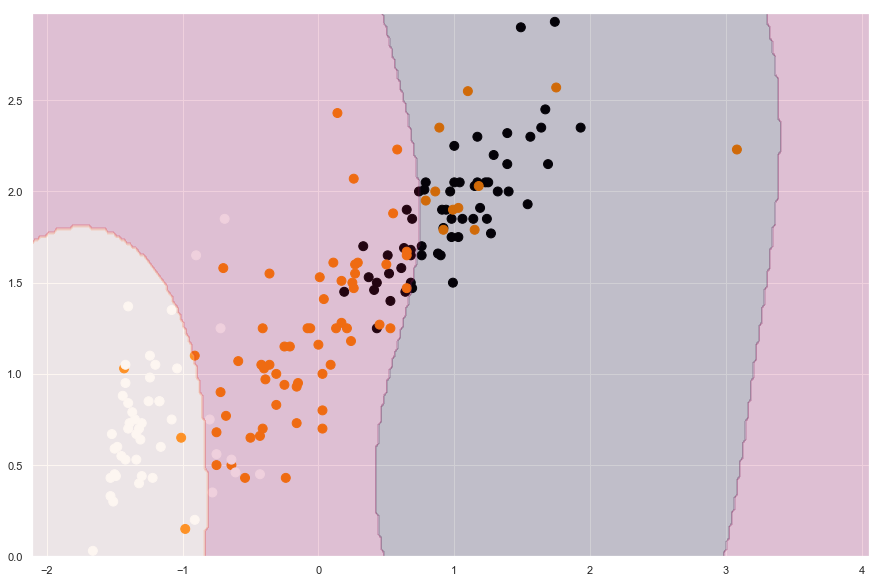

In [166]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.scatter(wine[col].values[:,0]-2, wine[col].values[:,1]-0.95, c=target, s=80, cmap='afmhot')
ax = plt.contourf(xx, yy, z, alpha=0.2)
plt.show()

 Przewidywania mogą być lepsze jeśli uwzględnimy więcej cech.

Spróbujmy teraz sklasyfikować wina za pomocą wszystkich zmiennych

In [111]:
X = scale.fit_transform(wine.values)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

### Testowanie ulepszonego modelu

In [174]:
confusion_matrix(y_test, clf.predict(X_test))
cross_val_score(clf, X_train, clf.predict(X_train), cv=5).mean()

0.9650246305418719

Udało się wytrenować model na tyle dobrze, że z pewnością jest on w stanie na podstawie podanych cech sklasyfikować rodzaj wina